#Dependencies 

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

In [152]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=e3f2a68b89c54c930ac193e7c4108a6ca54ebb16e52dba6abac068ac54ee33e3
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [153]:
import eli5
from eli5.sklearn import PermutationImportance

#Import the dataset

In [57]:
df = pd.read_csv('/content/summer-products-with-rating-and-performance_2020-08.csv')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [59]:
df.head(5)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


#Search for missing values and duplicates 

In [60]:
df.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [61]:
#percentage of missing values 

missing_percentage = df.isnull().sum()/ len(df) * 100 

print(missing_percentage)

title                            0.000000
title_orig                       0.000000
price                            0.000000
retail_price                     0.000000
currency_buyer                   0.000000
units_sold                       0.000000
uses_ad_boosts                   0.000000
rating                           0.000000
rating_count                     0.000000
rating_five_count                2.860776
rating_four_count                2.860776
rating_three_count               2.860776
rating_two_count                 2.860776
rating_one_count                 2.860776
badges_count                     0.000000
badge_local_product              0.000000
badge_product_quality            0.000000
badge_fast_shipping              0.000000
tags                             0.000000
product_color                    2.606484
product_variation_size_id        0.890019
product_variation_inventory      0.000000
shipping_option_name             0.000000
shipping_option_price            0

In [62]:
#more than 30% can del 
del df['urgency_text']
del df['merchant_profile_picture']

In [63]:
del df['has_urgency_banner']

In [64]:
#percentage of missing values 

missing_percentage = df.isnull().sum()/ len(df) * 100 

print(missing_percentage)

title                           0.000000
title_orig                      0.000000
price                           0.000000
retail_price                    0.000000
currency_buyer                  0.000000
units_sold                      0.000000
uses_ad_boosts                  0.000000
rating                          0.000000
rating_count                    0.000000
rating_five_count               2.860776
rating_four_count               2.860776
rating_three_count              2.860776
rating_two_count                2.860776
rating_one_count                2.860776
badges_count                    0.000000
badge_local_product             0.000000
badge_product_quality           0.000000
badge_fast_shipping             0.000000
tags                            0.000000
product_color                   2.606484
product_variation_size_id       0.890019
product_variation_inventory     0.000000
shipping_option_name            0.000000
shipping_option_price           0.000000
shipping_is_expr

#Median imputation for numerical missing values


In [65]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()

In [66]:
num_cols

['price',
 'retail_price',
 'units_sold',
 'uses_ad_boosts',
 'rating',
 'rating_count',
 'rating_five_count',
 'rating_four_count',
 'rating_three_count',
 'rating_two_count',
 'rating_one_count',
 'badges_count',
 'badge_local_product',
 'badge_product_quality',
 'badge_fast_shipping',
 'product_variation_inventory',
 'shipping_option_price',
 'shipping_is_express',
 'countries_shipped_to',
 'inventory_total',
 'merchant_rating_count',
 'merchant_rating',
 'merchant_has_profile_picture']

In [67]:
num_missing = df.select_dtypes(include='number').isnull().sum()
num_missing = num_missing[num_missing > 0]
print(num_missing)

rating_five_count     45
rating_four_count     45
rating_three_count    45
rating_two_count      45
rating_one_count      45
dtype: int64


In [68]:
median = df['rating_five_count'].median()

df['rating_five_count'].fillna(median, inplace=True)

In [69]:
median = df['rating_four_count'].median()

df['rating_four_count'].fillna(median, inplace =True)

In [70]:
median = df['rating_three_count'].median()

df['rating_three_count'].fillna(median, inplace =True)

In [71]:
median = df['rating_two_count'].median()

df['rating_two_count'].fillna(median, inplace =True)

In [72]:
median = df['rating_one_count'].median()

df['rating_one_count'].fillna(median, inplace=True)

#Mode imputation of categorical missing value


In [73]:
cat_missing = df.select_dtypes(include='object').isnull().sum()
cat_missing = cat_missing[cat_missing > 0]
print(cat_missing)

product_color                41
product_variation_size_id    14
origin_country               17
merchant_name                 4
merchant_info_subtitle        1
dtype: int64


In [74]:
mode = df['product_color'].mode().iloc[0]

df['product_color'].fillna(mode, inplace=True)

In [75]:
mode = df['product_variation_size_id'].mode().iloc[0]

df['product_variation_size_id'].fillna(mode, inplace=True)

In [76]:
mode = df['origin_country'].mode().iloc[0]

df['origin_country'].fillna(mode, inplace=True)

In [77]:
mode = df['merchant_name'].mode().iloc[0]

df['merchant_name'].fillna(mode, inplace=True)

In [78]:
mode = df['merchant_info_subtitle'].mode().iloc[0]

df['merchant_info_subtitle'].fillna(mode, inplace=True)

#Check if there is any missing value left

In [79]:
#check if there is still missing values
print(df.isnull().values.sum() !=0)

False


#Remove some columns



In [80]:
del df['title_orig']

#Check for duplicates

In [81]:
df.duplicated().any()

True

In [82]:
dupes=df.duplicated()
#dupes
sum(dupes)

232

In [83]:
#dropping duplicate values

df = df.drop_duplicates()
df


,title,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,...,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,...,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,...,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,...,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,...,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,...,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,Nouveau Pantalon De Mode D'été Femmes Leggings...,3.00,8,EUR,100,1,3.79,57,25.0,10.0,...,"(4,080 notes)",4080,3.987990,584a7a381591451e4e3af3df,0,https://www.wish.com/c/5e8f0165e815903d022a3c7c,https://contestimg.wish.com/api/webimage/5e8f0...,5e8f0165e815903d022a3c7c,summer,2020-08
1567,Combinaison sans manches pour femmes couleur u...,8.00,7,EUR,20000,1,4.25,3127,1919.0,580.0,...,"88 % avis positifs (16,803 notes)",16803,4.155032,56455b13b15aab129db58cb7,0,https://www.wish.com/c/5c91a7ae7cfe8e4e64c36d97,https://contestimg.wish.com/api/webimage/5c91a...,5c91a7ae7cfe8e4e64c36d97,summer,2020-08
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,6.00,9,EUR,10000,1,4.08,1367,722.0,293.0,...,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1570,Nouveautés Hommes Siwmwear Beach-Shorts Hommes...,5.00,19,EUR,100,0,3.71,59,24.0,15.0,...,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,https://www.wish.com/c/5e74be96034d613d42b52dfe,https://contestimg.wish.com/api/webimage/5e74b...,5e74be96034d613d42b52dfe,summer,2020-08


In [30]:
#we can also drop duplicate values like that :---

# imp.drop_duplicates(inplace=True)

# dropping = imp.copy()
# dropping

In [84]:
df.duplicated().any()

False

#Change to date time format


In [85]:
df['crawl_month']= pd.to_datetime(df['crawl_month'])

#Calculate count, mean, std, min, 25%, 50%, 75%, max values for each column. Prepare an analysis of the difference between mean and median for each column and possible reasons for the same.

In [86]:
df.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,...,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1.341000e+03,1341.000000,1341.000000
mean,8.458218,23.819538,4820.662938,0.435496,3.840127,981.858315,476.601790,193.417972,145.021626,68.578673,...,0.077554,0.014169,33.838926,2.384042,0.002983,40.680835,49.790455,2.787363e+04,4.040607,0.151380
std,3.977299,30.512737,9947.731683,0.496007,0.485037,2093.654152,1021.323857,417.291985,326.207541,158.387492,...,0.267568,0.118229,21.044289,1.039237,0.054554,20.169013,2.774634,8.357111e+04,0.202343,0.358552
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,0.000000e+00,2.333333,0.000000
25%,5.850000,7.000000,100.000000,0.000000,3.580000,30.000000,17.000000,7.000000,5.000000,3.000000,...,0.000000,0.000000,8.000000,2.000000,0.000000,32.000000,50.000000,2.366000e+03,3.930573,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.870000,209.000000,95.000000,38.000000,28.000000,13.000000,...,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,8.740000e+03,4.048356,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.120000,939.000000,453.000000,180.000000,141.000000,68.000000,...,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,2.522200e+04,4.168097,0.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,...,1.000000,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,2.174765e+06,5.000000,1.000000


In [87]:
round(df.describe())

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1341.0,1341.0,1341.0,1341.0,1341.0,1341.0,1341.0,1341.0,1341.0,1341.0,...,1341.0,1341.0,1341.0,1341.0,1341.0,1341.0,1341.0,1341.0,1341.0,1341.0
mean,8.0,24.0,4821.0,0.0,4.0,982.0,477.0,193.0,145.0,69.0,...,0.0,0.0,34.0,2.0,0.0,41.0,50.0,27874.0,4.0,0.0
std,4.0,31.0,9948.0,0.0,0.0,2094.0,1021.0,417.0,326.0,158.0,...,0.0,0.0,21.0,1.0,0.0,20.0,3.0,83571.0,0.0,0.0
min,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,6.0,1.0,0.0,2.0,0.0
25%,6.0,7.0,100.0,0.0,4.0,30.0,17.0,7.0,5.0,3.0,...,0.0,0.0,8.0,2.0,0.0,32.0,50.0,2366.0,4.0,0.0
50%,8.0,10.0,1000.0,0.0,4.0,209.0,95.0,38.0,28.0,13.0,...,0.0,0.0,50.0,2.0,0.0,40.0,50.0,8740.0,4.0,0.0
75%,11.0,26.0,5000.0,1.0,4.0,939.0,453.0,180.0,141.0,68.0,...,0.0,0.0,50.0,3.0,0.0,43.0,50.0,25222.0,4.0,0.0
max,49.0,252.0,100000.0,1.0,5.0,20744.0,11548.0,4152.0,3658.0,2003.0,...,1.0,1.0,50.0,12.0,1.0,140.0,50.0,2174765.0,5.0,1.0


#Data Visualization

Data visualization: This involves creating various types of plots and charts to visualize the distribution, relationships, and trends in the data, such as histograms, scatter plots, box plots, and heatmaps.

##Histogram

In [35]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()

num_cols

['price',
 'retail_price',
 'units_sold',
 'uses_ad_boosts',
 'rating',
 'rating_count',
 'rating_five_count',
 'rating_four_count',
 'rating_three_count',
 'rating_two_count',
 'rating_one_count',
 'badges_count',
 'badge_local_product',
 'badge_product_quality',
 'badge_fast_shipping',
 'product_variation_inventory',
 'shipping_option_price',
 'shipping_is_express',
 'countries_shipped_to',
 'inventory_total',
 'merchant_rating_count',
 'merchant_rating',
 'merchant_has_profile_picture']

In [36]:
columns_to_plot = ['price',
 'retail_price',
 'units_sold',
 'uses_ad_boosts',
 'badges_count',
 'badge_local_product',
 'badge_product_quality',
 'badge_fast_shipping',
 'product_variation_inventory',
 'shipping_option_price',
 'shipping_is_express',
 'countries_shipped_to',
 'inventory_total',
 'merchant_rating_count',
 'merchant_rating',
 'merchant_has_profile_picture']

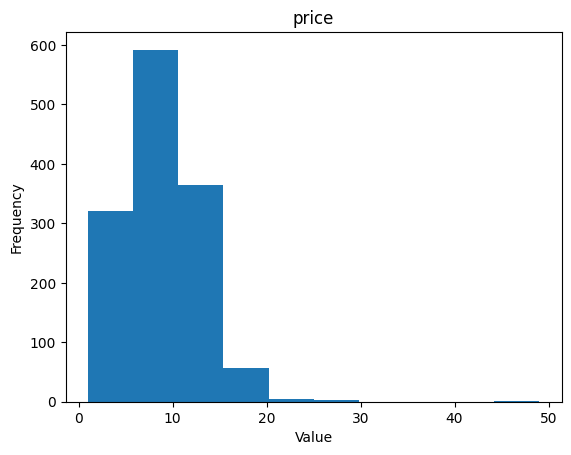

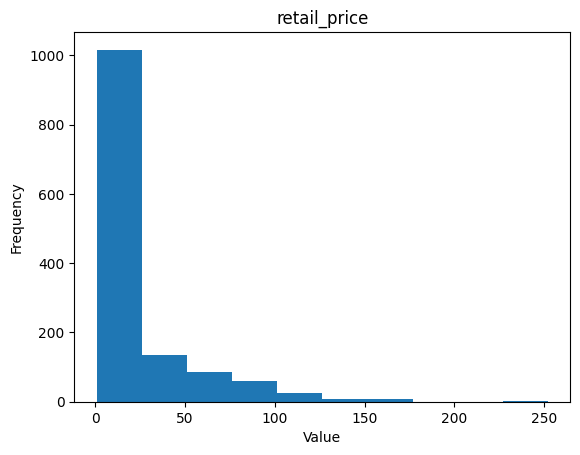

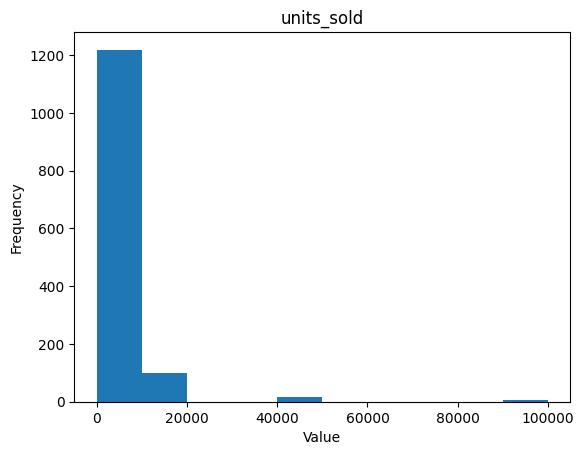

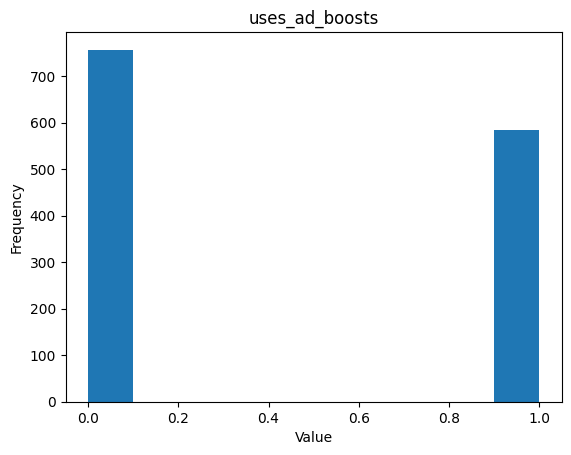

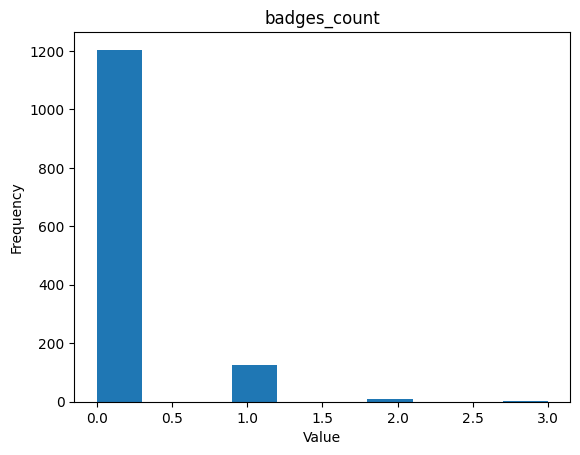

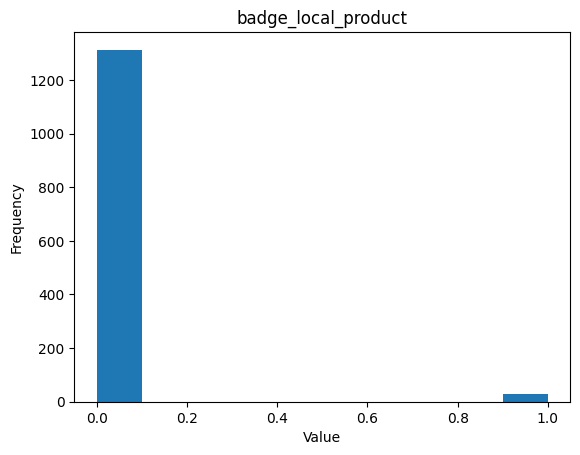

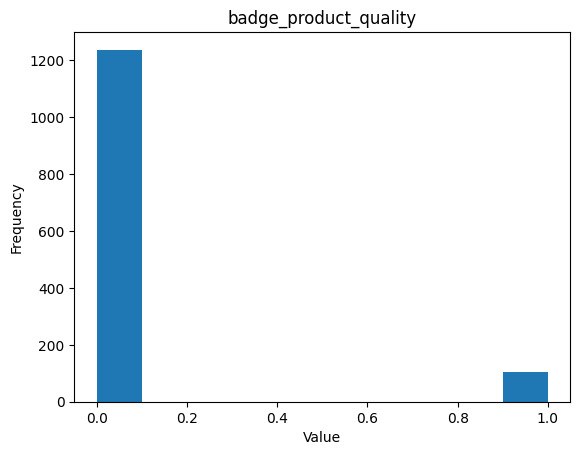

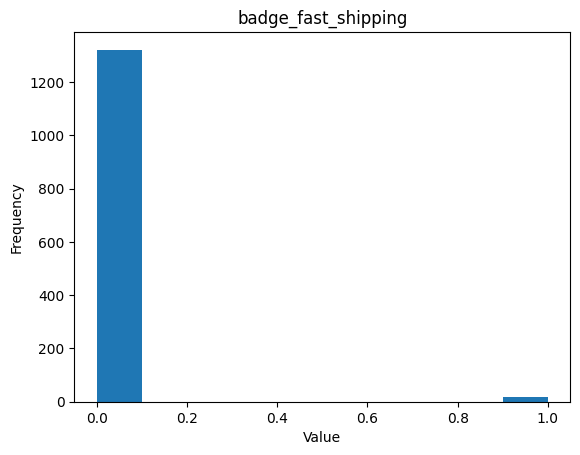

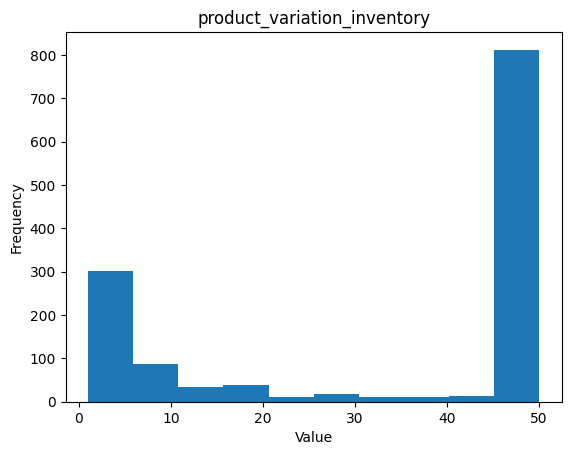

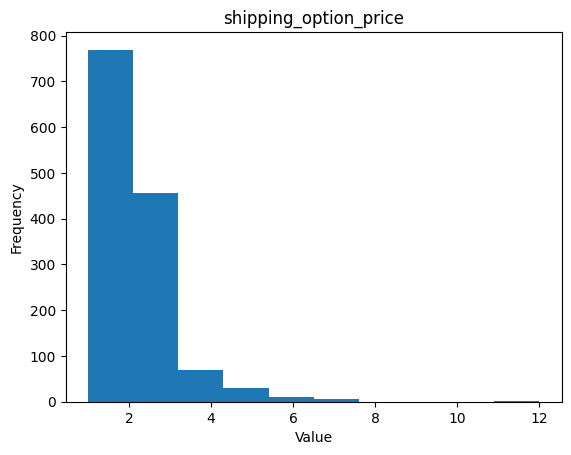

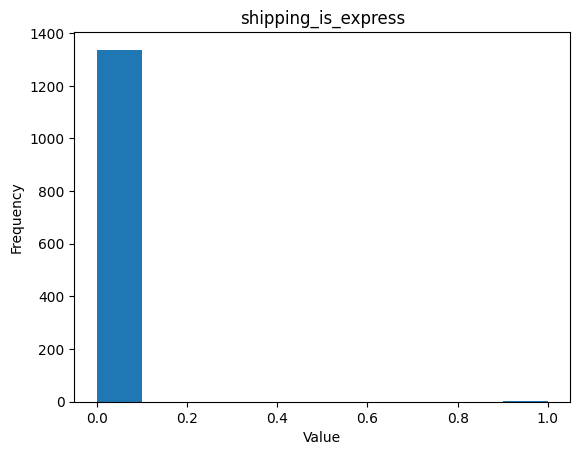

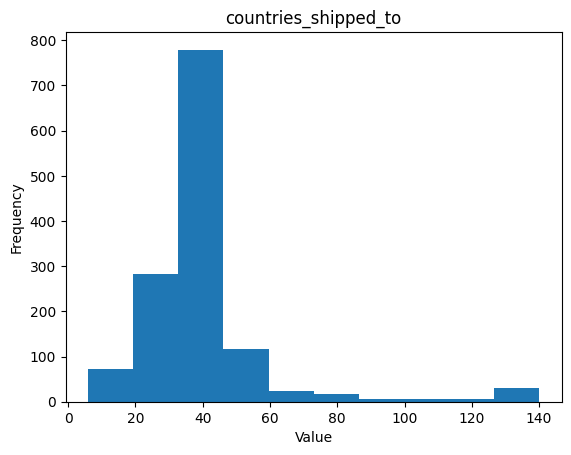

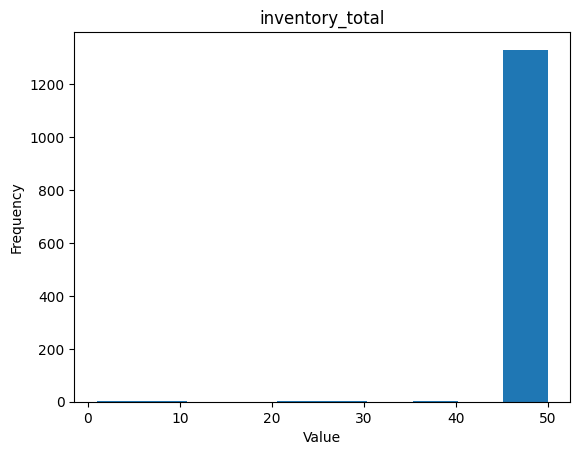

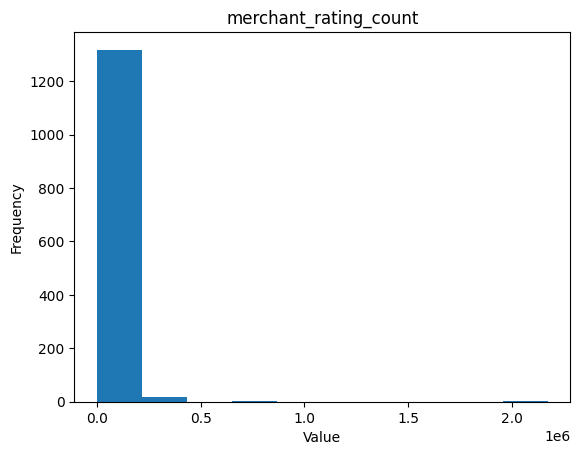

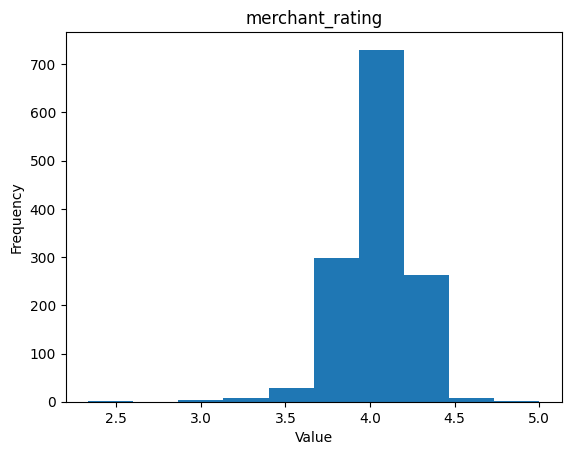

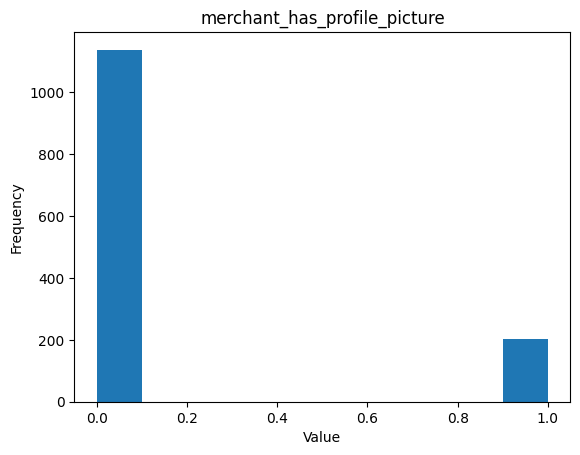

In [37]:
# create a histogram for each column
for col in columns_to_plot:
    plt.hist(df[col], bins=10)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

##Boxplot

In [38]:
#Boxplot

columns_to_plot2 = ['rating',
 'rating_count',
 'rating_five_count',
 'rating_four_count',
 'rating_three_count',
 'rating_two_count',
 'rating_one_count'] 


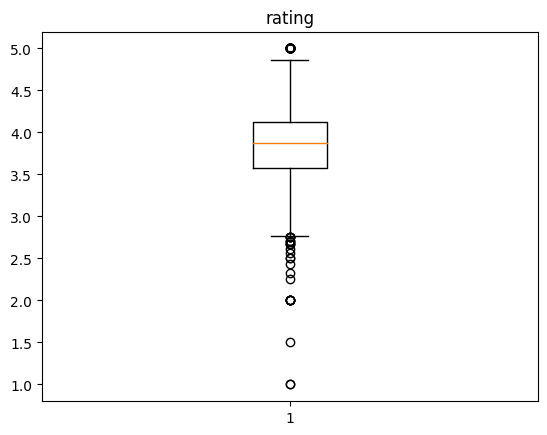

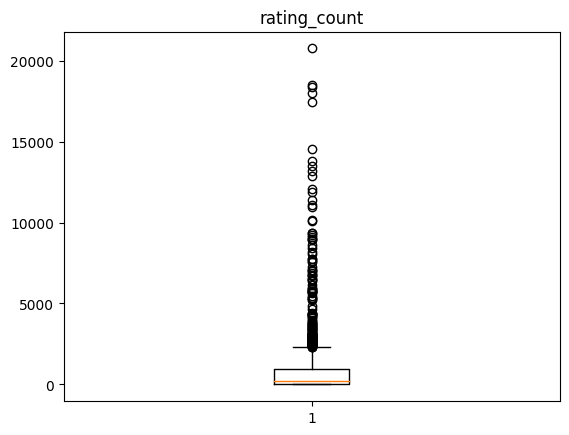

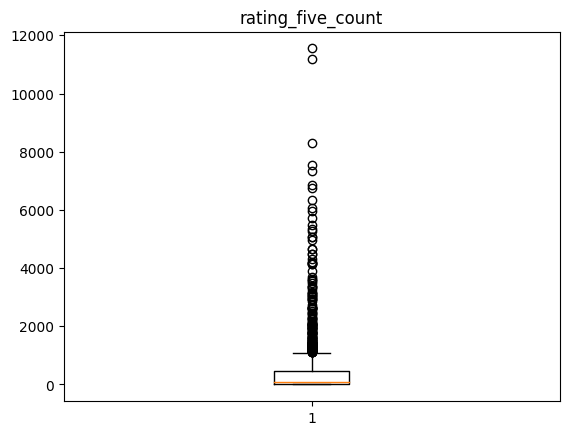

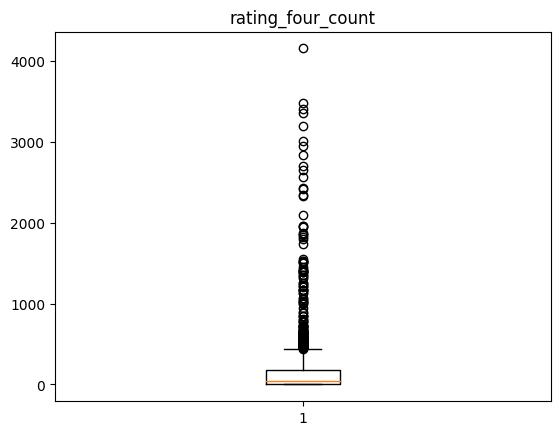

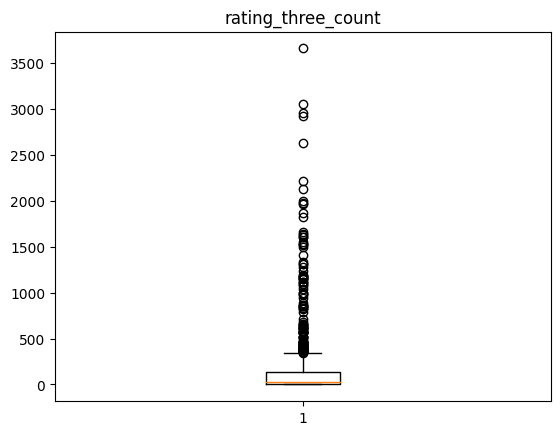

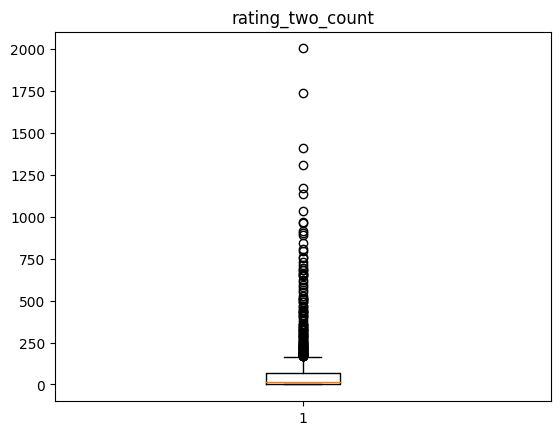

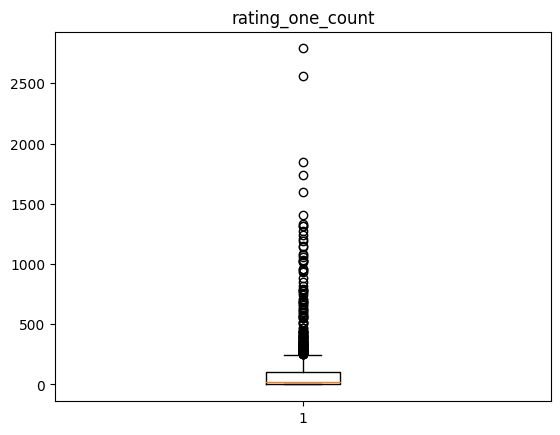

In [39]:
# create boxplot for ratings 

for col in columns_to_plot2:
  plt.boxplot(df[col])
  plt.title(col)
  plt.show()


Seems like there is alot of outliers in the ratings. 

In [40]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

cat_cols

['title',
 'currency_buyer',
 'tags',
 'product_color',
 'product_variation_size_id',
 'shipping_option_name',
 'origin_country',
 'merchant_title',
 'merchant_name',
 'merchant_info_subtitle',
 'merchant_id',
 'product_url',
 'product_picture',
 'product_id',
 'theme']

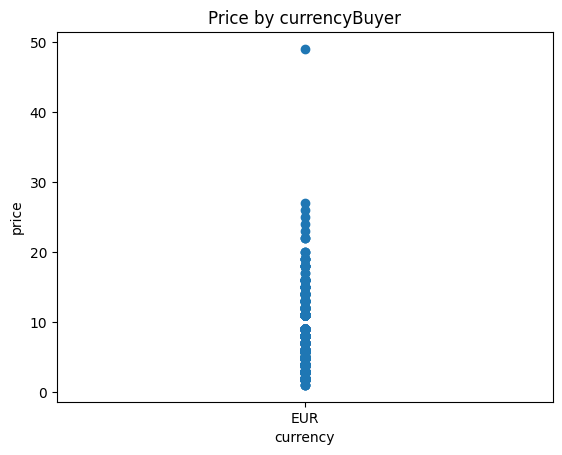

In [41]:
plt.scatter(df['currency_buyer'], df['price'])

plt.title('Price by currencyBuyer')

plt.ylabel('price')
plt.xlabel('currency')

plt.show()

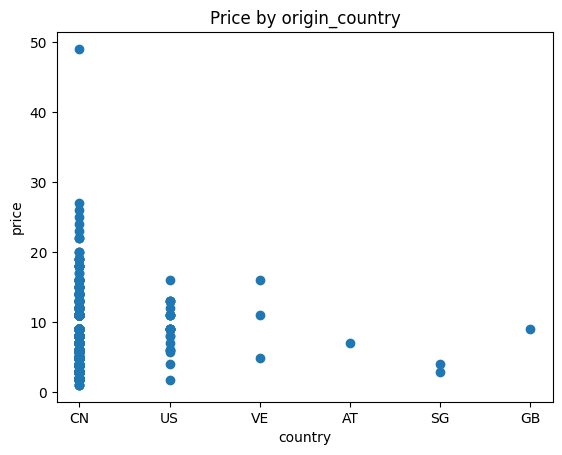

In [42]:
plt.scatter(df['origin_country'], df['price'])

plt.title('Price by origin_country')

plt.ylabel('price')
plt.xlabel('country')

plt.show()

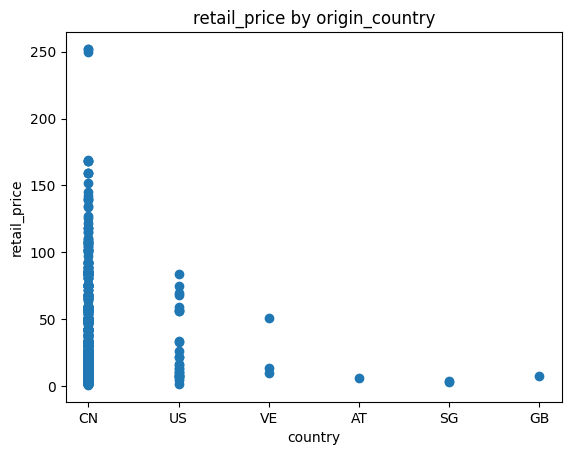

In [43]:
plt.scatter(df['origin_country'], df['retail_price'])

plt.title('retail_price by origin_country')

plt.ylabel('retail_price')
plt.xlabel('country')

plt.show()

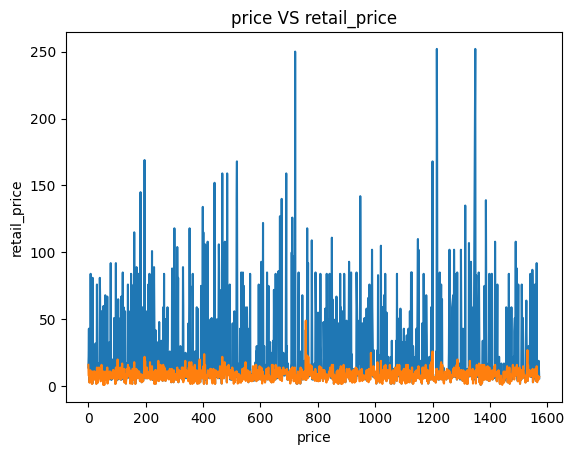

In [44]:
#Price vs retail price

#scatter plot with price against retail price       #THIS ONE IS NUMERICAL VS NUMERICAL  (CAN/ CORRECT)
plt.plot(df['retail_price'])
plt.plot(df['price'])

#Title
plt.title('price VS retail_price')

#setting labels X and Y
plt.xlabel('price')
plt.ylabel('retail_price')

plt.show()


The overall data science project flow involves a series of steps or phases that are typically followed to solve a business problem or answer a research question using data. Although the exact steps may vary depending on the project, data, and stakeholders involved, a typical data science project flow may include the following:

Problem formulation: In this phase, the problem or question is defined, and the goals and objectives of the project are established. The key stakeholders and data sources are identified, and the project scope and timeline are determined.

Data collection: In this phase, the data required for the analysis is collected from various sources and consolidated into a single dataset. Data cleaning and preprocessing are also performed to remove missing values, outliers, and other data quality issues that could affect the analysis.

Exploratory data analysis (EDA): In this phase, the data is visualized and summarized to gain insights and identify potential issues or opportunities for further analysis. This includes creating various types of plots and charts, calculating descriptive statistics, and testing hypotheses.

Feature engineering: In this phase, the most important features or variables that explain the variation in the data are identified and selected using techniques such as PCA, feature selection, or feature extraction. New features may also be created by combining or transforming existing features.

Model selection and training: In this phase, the appropriate modeling technique is selected based on the nature of the problem and the data. The data is split into training and testing sets, and the model is trained on the training data using various algorithms and hyperparameters. The model is also evaluated on the testing data to check for overfitting or underfitting.

Model evaluation and validation: In this phase, the performance of the model is evaluated using various metrics such as accuracy, precision, recall, F1 score, and AUC-ROC. The model is also validated using techniques such as cross-validation, bootstrap, or permutation testing to ensure its robustness and generalizability.

Model deployment: In this phase, the model is integrated into the business process or application to make predictions or generate insights. The results are communicated to the stakeholders in a clear and actionable manner using visualizations, dashboards, or reports.

Model monitoring and maintenance: In this phase, the model is monitored and maintained over time to ensure its performance remains optimal and up-to-date. This includes monitoring for data drift, concept drift, or model decay, and retraining or updating the model as needed.

#Hypothesis Testing 

Predict the price.. 

Target variable: price 



The key difference between hypothesis testing and ANOVA is that hypothesis testing is used to test a single hypothesis, whereas ANOVA is used to test multiple hypotheses simultaneously.

In [ ]:
#H0 = retail price has no effect on price 
#H1 = retail price has effect on price 

# conduct a two-sample t-test
t_stat, p_value = ttest_ind(df['retail_price'], df['price'])

# print the results
print('t-statistic:', t_stat)
print('p-value:', p_value)

# interpret the results
if p_value < 0.05:
    print('Reject null hypothesis: retail price has effect on price ')
else:
    print('Fail to reject null hypothesis: retail price has no effect on price ')

t-statistic: 18.281138753456673
p-value: 1.8800768537453725e-70
Reject null hypothesis: retail price has effect on price 


In [ ]:
#H0 = currency_buyer has no effect on price 
#H1 = currency_buyer has effect on price  

df['currency_buyer'] = pd.to_numeric(df['currency_buyer'], errors='coerce')

# conduct a two-sample t-test
t_stat, p_value = ttest_ind(df['currency_buyer'], df['price'])

# print the results
print('t-statistic:', t_stat)
print('p-value:', p_value)

# interpret the results
if p_value < 0.05:
    print('Reject null hypothesis:currency_buyer has effect on price   ')
else:
    print('Fail to reject null hypothesis: currency_buyer has no effect on price  ')     #no result in pvalue and ttest because the curencybuyer is not numeric.... 

t-statistic: nan
p-value: nan
Fail to reject null hypothesis: currency_buyer has no effect on price  


In [ ]:
#H0 = units_sold has no effect on price 
#H1 = units_sold has effect on price  

t_stat, p_value = ttest_ind(df['units_sold'], df['price'])

print('t-statistics:', t_stat)
print('p-value:', p_value)

if p_value <0.05: 
  print('Reject null hypothesis: units_sold has effect on price')
else: 
  print('Fail to reject null hypothesis: units_sold has no effect on price')


t-statistics: 17.714723838408936
p-value: 1.7222943506732548e-66
Reject null hypothesis: units_sold has effect on price


In [ ]:
#H0 = uses_ad_boosts has no effect on price 
#H1 = uses_ad_boosts has effect on price  


t_stat, p_value = ttest_ind(df['uses_ad_boosts'], df['price'])

print('t-statistics:', t_stat)
print('p-value:', p_value)

if p_value <0.05: 
  print('Reject null hypothesis: uses_ad_boosts has effect on price')
else: 
  print('Fail to reject null hypothesis: uses_ad_boosts has no effect on price')


t-statistics: -73.29878089539096
p-value: 0.0
Reject null hypothesis: uses_ad_boosts has effect on price


In [ ]:
#H0 = rating has no effect on price 
#H1 = rating has effect on price  

t_stat, p_value = ttest_ind(df['rating'], df['price'])

print('t-statistics:', t_stat)
print('p-value:', p_value)

if p_value <0.05: 
  print('Reject null hypothesis: rating has effect on price')
else: 
  print('Fail to reject null hypothesis: rating has no effect on price')


t-statistics: -42.2068567070072
p-value: 6.219591125514174e-299
Reject null hypothesis: rating has effect on price


In [ ]:
#H0 = badges_count has no effect on price 
#H1 = badges_count has effect on price  

t_stat, p_value = ttest_ind(df['badges_count'], df['price'])

print('t-statistics:', t_stat)
print('p-value:', p_value)

if p_value <0.05: 
  print('Reject null hypothesis: badges_count has effect on price')
else: 
  print('Fail to reject null hypothesis: badges_count has no effect on price')


t-statistics: -76.5403930863741
p-value: 0.0
Reject null hypothesis: badges_count has effect on price


In [ ]:
#H0 = badge_product_quality has no effect on price 
#H1 = badge_product_quality has effect on price  

t_stat, p_value = ttest_ind(df['badge_product_quality'], df['price'])

print('t-statistics:', t_stat)
print('p-value:', p_value)

if p_value <0.05: 
  print('Reject null hypothesis: badge_product_quality has effect on price')
else: 
  print('Fail to reject null hypothesis: badge_product_quality has no effect on price')

t-statistics: -76.98818213089739
p-value: 0.0
Reject null hypothesis: badge_product_quality has effect on price


In [ ]:
#H0 = badge_fast_shipping has no effect on price 
#H1 = badge_fast_shipping has effect on price  

t_stat, p_value = ttest_ind(df['badge_fast_shipping'], df['price'])

print('t-statistics:', t_stat)
print('p-value:', p_value)

if p_value <0.05: 
  print('Reject null hypothesis: badge_fast_shipping has effect on price')
else: 
  print('Fail to reject null hypothesis: badge_fast_shipping has no effect on price')

t-statistics: -77.71147564468347
p-value: 0.0
Reject null hypothesis: badge_fast_shipping has effect on price


In [ ]:
#H0 = tags has no effect on price 
#H1 = tags has effect on price  

df['tags'] = pd.to_numeric(df['tags'], errors='coerce')

t_stat, p_value = ttest_ind(df['tags'], df['price'])

print('t-statistics:', t_stat)
print('p-value:', p_value)

if p_value <0.05: 
  print('Reject null hypothesis: tags has effect on price')
else: 
  print('Fail to reject null hypothesis: tags has no effect on price')   #tags is categorical thats why no tstats, and p-value results... 

t-statistics: nan
p-value: nan
Fail to reject null hypothesis: tags has no effect on price


In [ ]:
#H0 = shipping_option_price has no effect on price 
#H1 = shipping_option_price has effect on price  

t_stat, p_value = ttest_ind(df['shipping_option_price'], df['price'])

print('t-statistics:', t_stat)
print('p-value:', p_value)

if p_value <0.05: 
  print('Reject null hypothesis: shipping_option_price has effect on price')
else: 
  print('Fail to reject null hypothesis: shipping_option_price has no effect on price') 

t-statistics: -54.109349634427765
p-value: 0.0
Reject null hypothesis: shipping_option_price has effect on price


In [ ]:
#H0 = shipping_is_express has no effect on price 
#H1 = shipping_is_express has effect on price  

t_stat, p_value = ttest_ind(df['shipping_is_express'], df['price'])

print('t-statistics:', t_stat)
print('p-value:', p_value)

if p_value <0.05: 
  print('Reject null hypothesis: shipping_is_express has effect on price')
else: 
  print('Fail to reject null hypothesis: shipping_is_express has no effect on price') 

t-statistics: -77.84146880463433
p-value: 0.0
Reject null hypothesis: shipping_is_express has effect on price


In [ ]:
#H0 = countries_shipped_to has no effect on price 
#H1 = countries_shipped_to has effect on price  

t_stat, p_value = ttest_ind(df['countries_shipped_to'], df['price'])

print('t-statistics:', t_stat)
print('p-value:', p_value)

if p_value <0.05: 
  print('Reject null hypothesis: countries_shipped_to has effect on price')
else: 
  print('Fail to reject null hypothesis: countries_shipped_to has no effect on price') 

t-statistics: 57.399266671525325
p-value: 0.0
Reject null hypothesis: countries_shipped_to has effect on price


In [ ]:
#H0 = theme has no effect on price 
#H1 = theme has effect on price  

df['theme'] = pd.to_numeric(df['theme'], errors='coerce')

t_stat, p_value = ttest_ind(df['theme'], df['price'])

print('t-statistics:', t_stat)
print('p-value:', p_value)

if p_value <0.05: 
  print('Reject null hypothesis: theme has effect on price')
else: 
  print('Fail to reject null hypothesis: theme has no effect on price')  #tags is categorical thats why no tstats, and p-value results... 

t-statistics: nan
p-value: nan
Fail to reject null hypothesis: theme has no effect on price


#Feature scaling 

<Axes: >

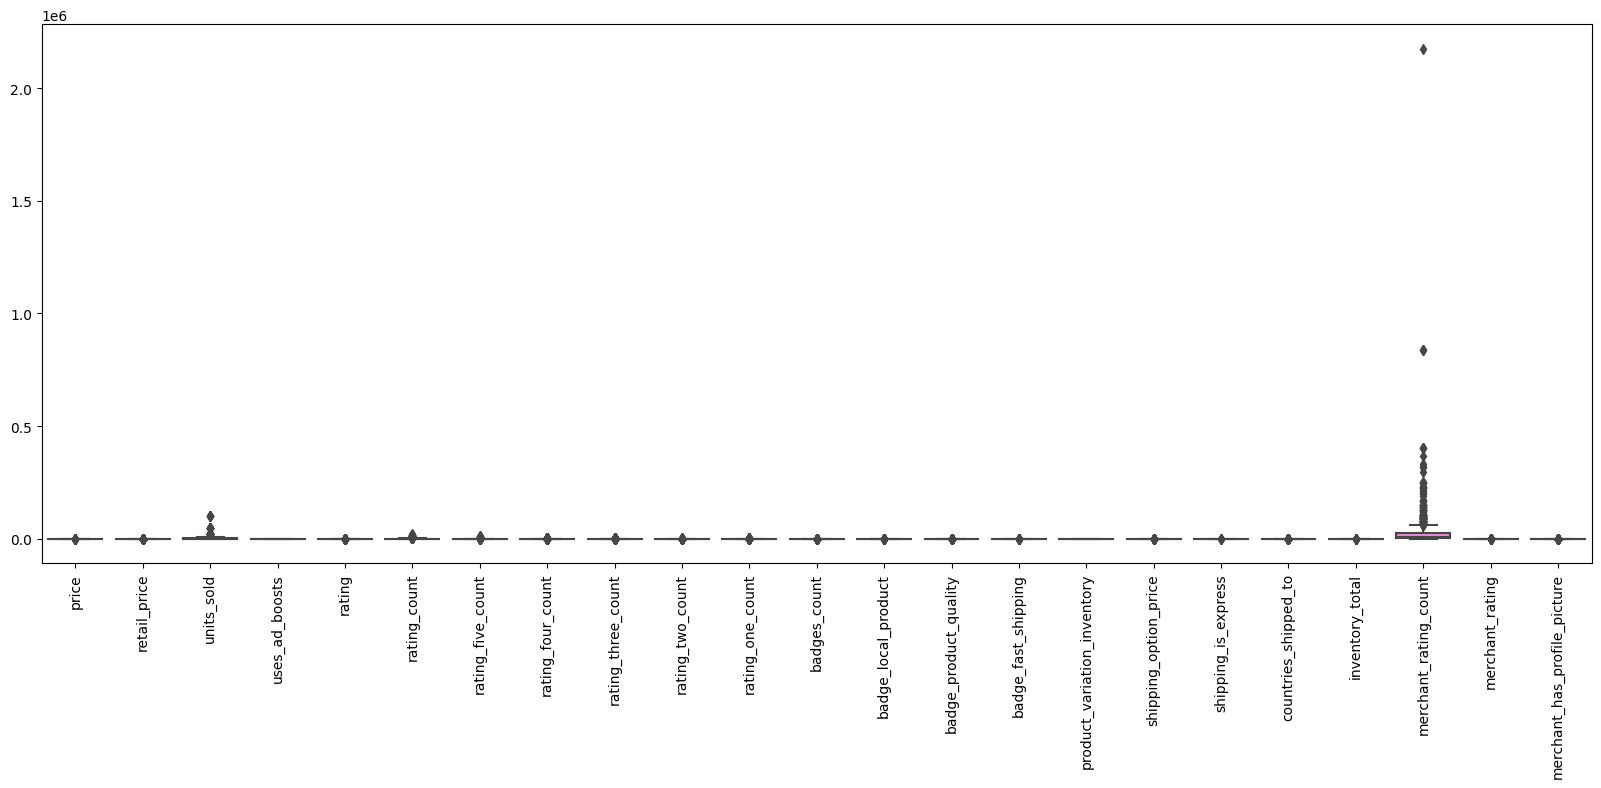

In [88]:
#Checking the Ranges of the independent variables and dependent variable 
plt.figure(figsize=(20,7))
plt.xticks(rotation= 'vertical')
sns.boxplot(data=df)

#Min max scaling

In [ ]:
scaler = MinMaxScaler()

num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

for col in num_cols:
    df[col] = scaler.fit_transform(df[[col]])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


<Axes: >

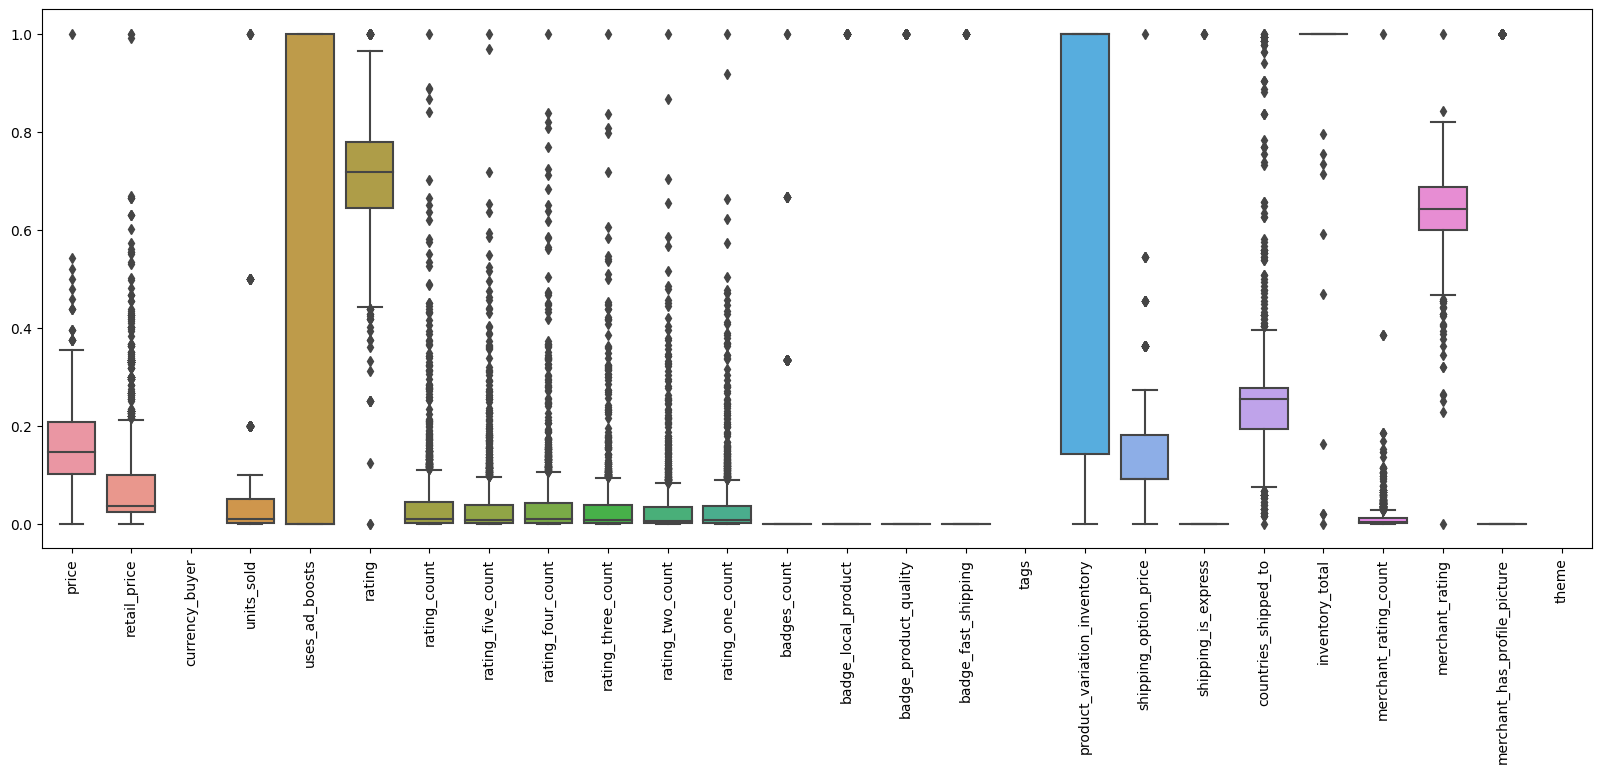

In [ ]:
plt.figure(figsize=(20,7))
plt.xticks(rotation= 'vertical')
sns.boxplot(data=df)

#Standardization 

In [89]:
scaler = StandardScaler()

num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

for col in num_cols:
    df[col] = scaler.fit_transform(df[[col]])

<Axes: >

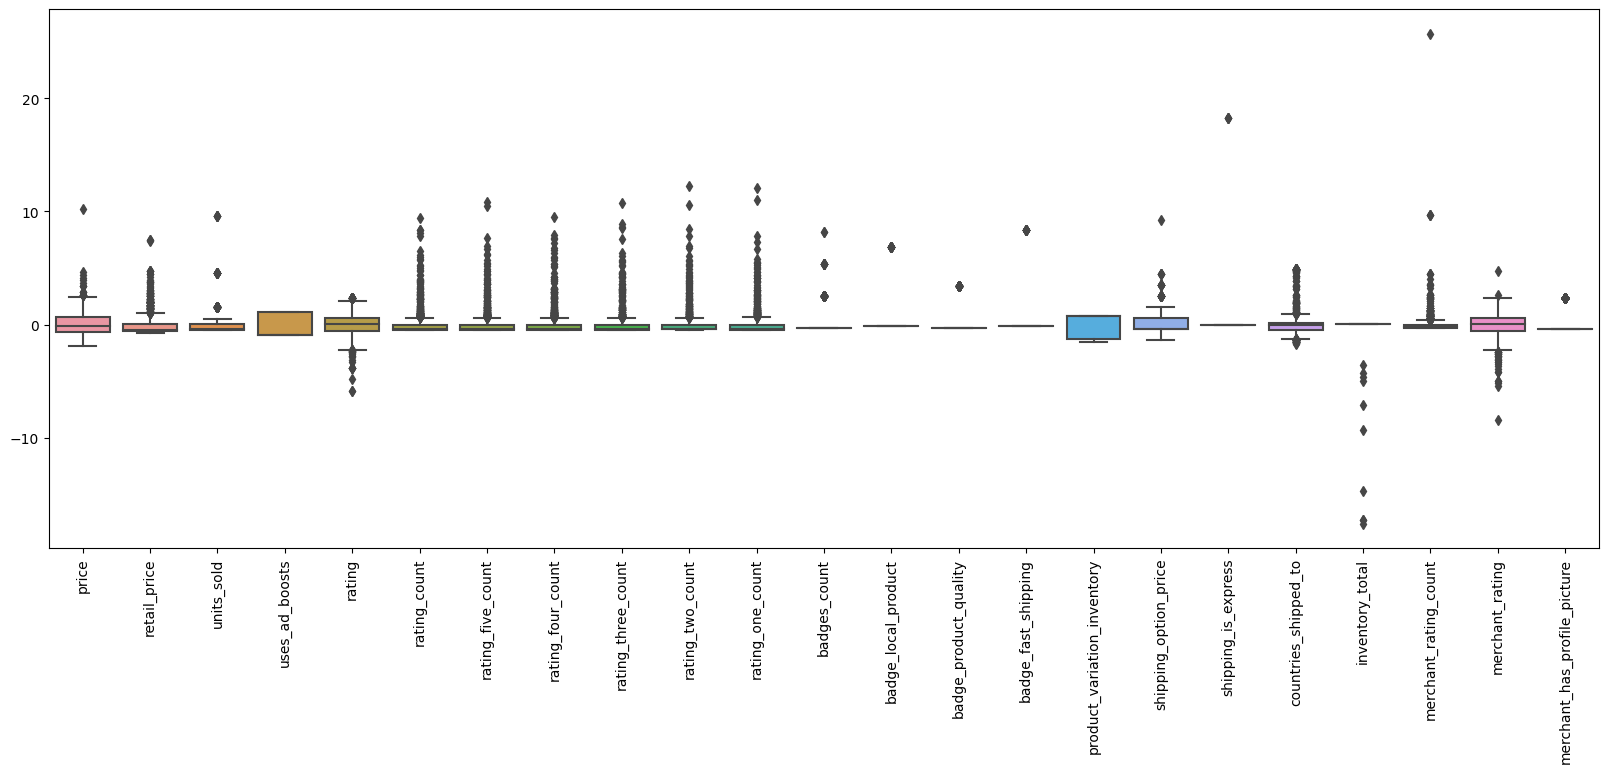

In [90]:
plt.figure(figsize=(20,7))
plt.xticks(rotation= 'vertical')
sns.boxplot(data=df)

#Outlier Treatment  (hold first ... )

#Label encoding 

In [91]:
df_encoded = df.copy()

for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])

In [92]:
df= df_encoded
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341 entries, 0 to 1572
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   title                         1341 non-null   int64         
 1   price                         1341 non-null   float64       
 2   retail_price                  1341 non-null   float64       
 3   currency_buyer                1341 non-null   int64         
 4   units_sold                    1341 non-null   float64       
 5   uses_ad_boosts                1341 non-null   float64       
 6   rating                        1341 non-null   float64       
 7   rating_count                  1341 non-null   float64       
 8   rating_five_count             1341 non-null   float64       
 9   rating_four_count             1341 non-null   float64       
 10  rating_three_count            1341 non-null   float64       
 11  rating_two_count              

# Heatmap ( Feature selection )

In [93]:
df.corr()

<ipython-input-93-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,title,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_picture,product_id,theme
title,1.000000,-0.038400,0.029934,NaN,-0.009674,0.023738,-0.021543,-0.013656,-0.017894,-0.009128,...,0.003429,0.033213,0.019514,-0.002024,-0.032499,-0.027099,0.009459,0.009459,0.009459,NaN
price,-0.038400,1.000000,0.317633,NaN,-0.043776,-0.070149,0.038876,-0.018927,-0.017891,-0.015063,...,0.011161,0.019326,-0.030318,0.034921,-0.016992,0.021430,-0.146739,-0.146739,-0.146739,NaN
retail_price,0.029934,0.317633,1.000000,NaN,0.008808,-0.024980,0.031452,0.052739,0.050445,0.060173,...,-0.001278,0.040728,0.034837,0.063056,-0.055378,0.048542,-0.128582,-0.128582,-0.128582,NaN
currency_buyer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
units_sold,-0.009674,-0.043776,0.008808,NaN,1.000000,-0.023642,0.026177,0.898844,0.875562,0.891158,...,-0.041633,0.100626,0.272979,0.110917,-0.246762,0.144752,-0.467852,-0.467852,-0.467852,NaN
uses_ad_boosts,0.023738,-0.070149,-0.024980,NaN,-0.023642,1.000000,-0.035654,-0.053441,-0.052113,-0.052789,...,-0.027922,-0.015523,0.027459,-0.045963,0.061400,0.002494,0.170853,0.170853,0.170853,NaN
rating,-0.021543,0.038876,0.031452,NaN,0.026177,-0.035654,1.000000,0.043586,0.096989,0.057941,...,0.009607,0.150748,0.026364,0.257697,-0.023118,0.011304,-0.059999,-0.059999,-0.059999,NaN
rating_count,-0.013656,-0.018927,0.052739,NaN,0.898844,-0.053441,0.043586,1.000000,0.982680,0.995837,...,-0.056082,0.112376,0.259842,0.131073,-0.266430,0.156792,-0.518158,-0.518158,-0.518158,NaN
rating_five_count,-0.017894,-0.017891,0.050445,NaN,0.875562,-0.052113,0.096989,0.982680,1.000000,0.980505,...,-0.046858,0.135463,0.248445,0.154822,-0.259134,0.158887,-0.512905,-0.512905,-0.512905,NaN
rating_four_count,-0.009128,-0.015063,0.060173,NaN,0.891158,-0.052789,0.057941,0.995837,0.980505,1.000000,...,-0.057736,0.111064,0.254011,0.133323,-0.265053,0.155224,-0.515563,-0.515563,-0.515563,NaN


<ipython-input-94-ea1924f15b27>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True );


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5]),
 [Text(0, 0.5, 'title'),
  Text(0, 1.5, 'price'),
  Text(0, 2.5, 'retail_price'),
  Text(0, 3.5, 'currency_buyer'),
  Text(0, 4.5, 'units_sold'),
  Text(0, 5.5, 'uses_ad_boosts'),
  Text(0, 6.5, 'rating'),
  Text(0, 7.5, 'rating_count'),
  Text(0, 8.5, 'rating_five_count'),
  Text(0, 9.5, 'rating_four_count'),
  Text(0, 10.5, 'rating_three_count'),
  Text(0, 11.5, 'rating_two_count'),
  Text(0, 12.5, 'rating_one_count'),
  Text(0, 13.5, 'badges_count'),
  Text(0, 14.5, 'badge_local_product'),
  Text(0, 15.5, 'badge_product_quality'),
  Text(0, 16.5, 'badge_fast_shipping'),
  Text(0, 17.5, 'tags'),
  Text(0, 18.5, 'product_color'),
  Text(0, 19.5, 'product_variation_size_id'),
  Text(0, 20.5, 'product_variation_inventory'),
  Tex

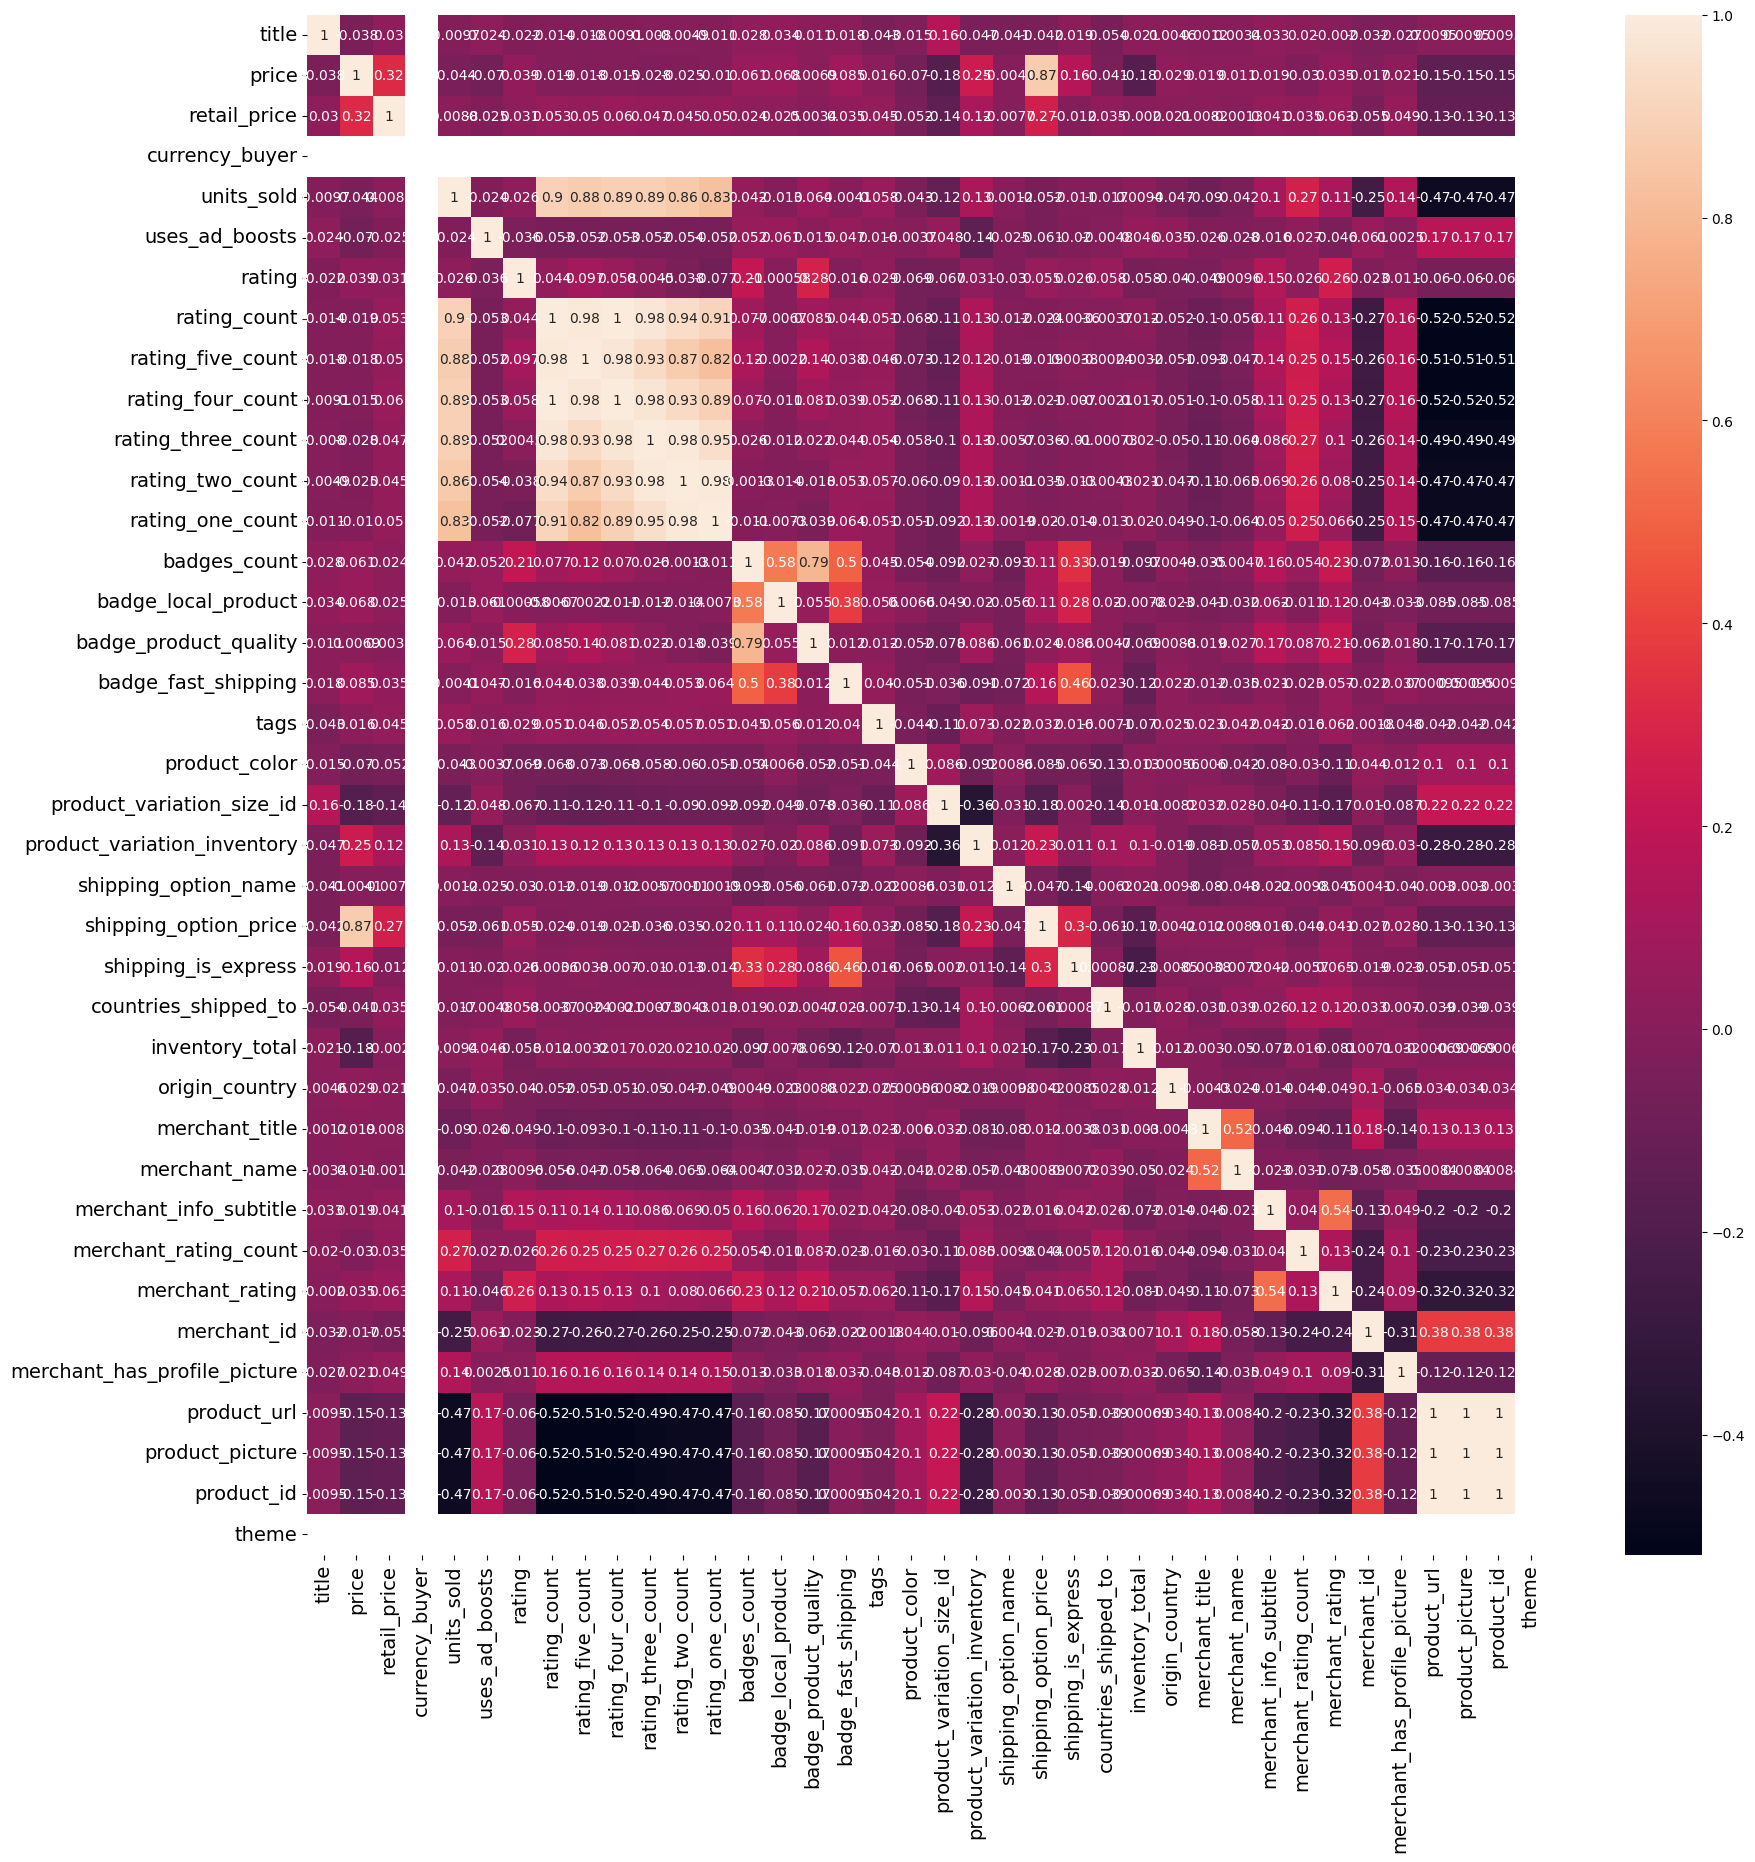

In [94]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True );
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [95]:
del df['rating_five_count']
del df['rating_four_count']
del df['rating_three_count']
del df['rating_two_count']
del df['rating_one_count']
del df['badge_product_quality']
del df['product_url']
del df['product_picture']
del df['currency_buyer']
del df['shipping_option_price']

In [96]:
del df['rating_count']

<ipython-input-97-ea1924f15b27>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True );


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5]),
 [Text(0, 0.5, 'title'),
  Text(0, 1.5, 'price'),
  Text(0, 2.5, 'retail_price'),
  Text(0, 3.5, 'units_sold'),
  Text(0, 4.5, 'uses_ad_boosts'),
  Text(0, 5.5, 'rating'),
  Text(0, 6.5, 'badges_count'),
  Text(0, 7.5, 'badge_local_product'),
  Text(0, 8.5, 'badge_fast_shipping'),
  Text(0, 9.5, 'tags'),
  Text(0, 10.5, 'product_color'),
  Text(0, 11.5, 'product_variation_size_id'),
  Text(0, 12.5, 'product_variation_inventory'),
  Text(0, 13.5, 'shipping_option_name'),
  Text(0, 14.5, 'shipping_is_express'),
  Text(0, 15.5, 'countries_shipped_to'),
  Text(0, 16.5, 'inventory_total'),
  Text(0, 17.5, 'origin_country'),
  Text(0, 18.5, 'merchant_title'),
  Text(0, 19.5, 'merchant_name'),
  Text(0, 20.5, 'merchant_info_subtitle'),
  Text(0, 21.5, 'merchant_rating_count'),
  Text(0, 22.5, 'merchant_ratin

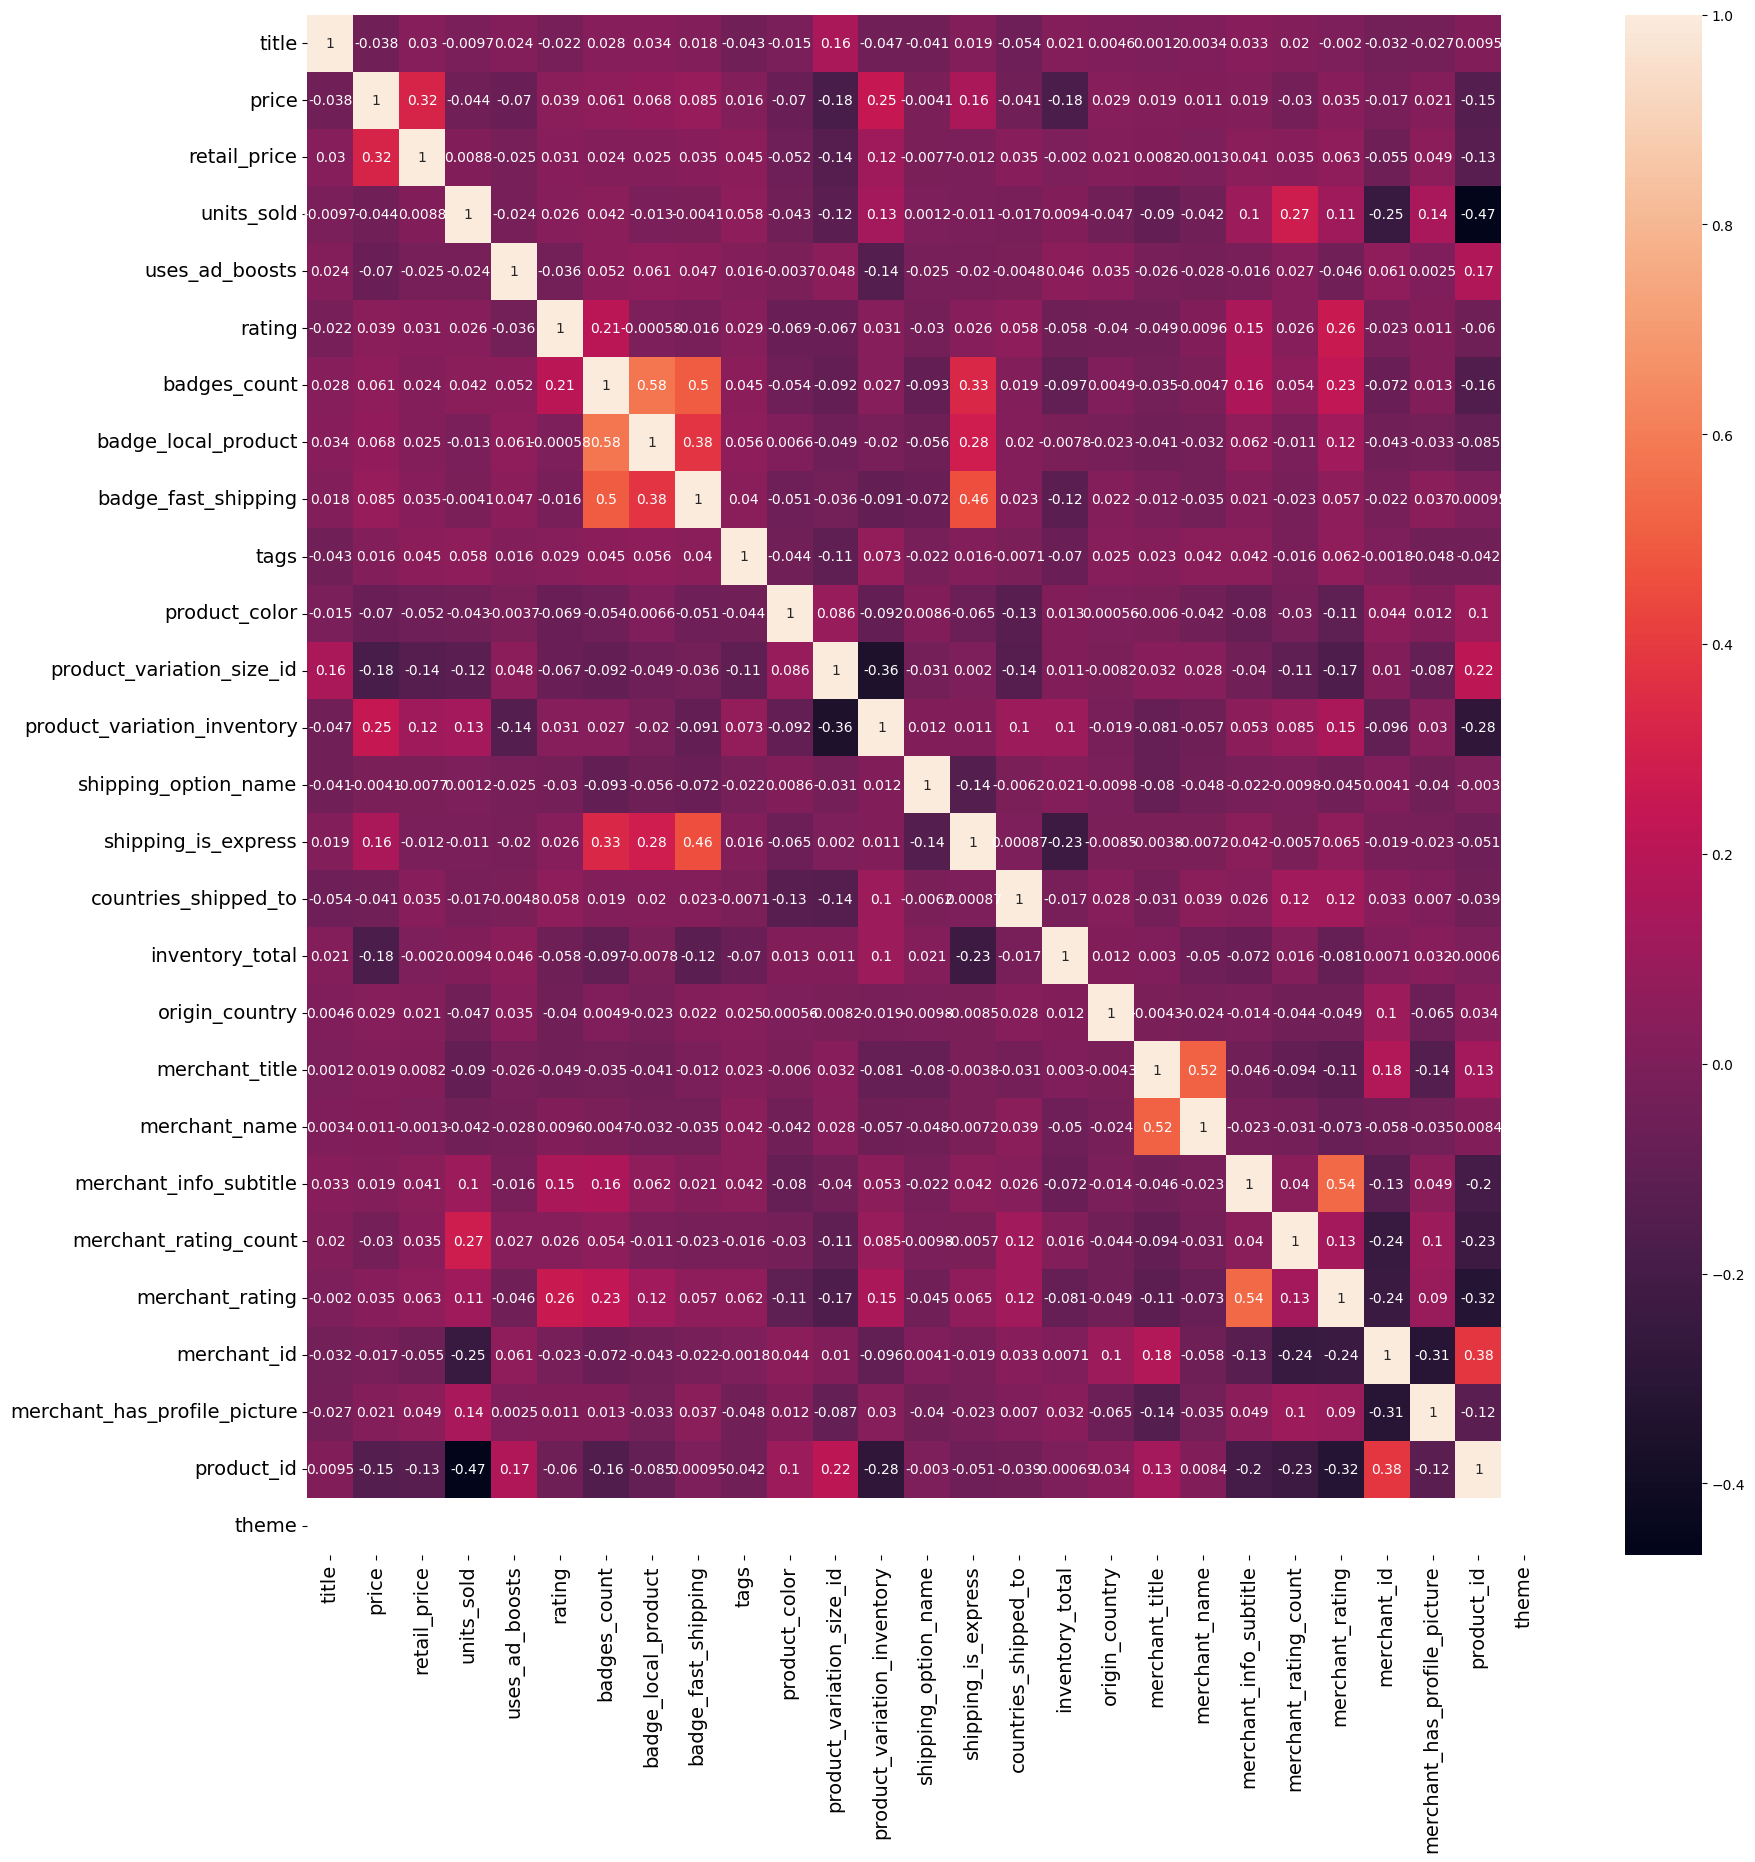

In [97]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True );
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [98]:
model = sm.OLS(df['price'], df[[
 'retail_price',
 'units_sold',
 'uses_ad_boosts',
 'rating',
 'badges_count',
 'badge_local_product',
 'badge_fast_shipping',
 'product_variation_inventory',
 'shipping_is_express',
 'countries_shipped_to',
 'inventory_total',
 'merchant_rating_count',
 'merchant_rating',
 'merchant_has_profile_picture']]).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.215
Model:                            OLS   Adj. R-squared (uncentered):              0.207
Method:                 Least Squares   F-statistic:                              26.00
Date:                Fri, 05 May 2023   Prob (F-statistic):                    1.75e-60
Time:                        05:16:22   Log-Likelihood:                         -1740.3
No. Observations:                1341   AIC:                                      3509.
Df Residuals:                    1327   BIC:                                      3581.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
retail_price                     0.2909      0.025     11.824      0.000       0.243       0.339
units_sold                      -0.0690      0.026     -2.681      0.007      -0.119      -0.019
uses_ad_boosts                  -0.0210      0.025     -0.850      0.396      -0.070       0.028
rating                           0.0334      0.026      1.284      0.200      -0.018       0.084
badges_count                    -0.0459      0.034     -1.348      0.178      -0.113       0.021
badge_local_product              0.0561      0.031      1.834      0.067      -0.004       0.116
badge_fast_shipping              0.0355      0.031      1.151      0.250      -0.025       0.096
product_variation_inventory      0.2541      0.026      9.897      0.000       0.204       0.304
shipping_is_express              0.0979      0.028      3.447      0.001       0.042       0.154
countries_shipped_to            -0.0777      0.025     -3.128      0.002      -0.126      -0.029
inventory_total                 -0.1813      0.025     -7.129      0.000      -0.231      -0.131
merchant_rating_count           -0.0249      0.026     -0.967      0.334      -0.075       0.026
merchant_rating                 -0.0327      0.026     -1.241      0.215      -0.084       0.019
merchant_has_profile_picture     0.0245      0.025      0.988      0.323      -0.024       0.073
==============================================================================
Omnibus:                      151.515   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.895
Skew:                           0.707   Prob(JB):                     3.39e-65
Kurtosis:                       4.821   Cond. No.                         2.66
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
#remove those variables that are not significant... 
del df['rating']
del df['uses_ad_boosts']
del df['badges_count']
del df['badge_local_product']
del df['badge_fast_shipping']
del df['merchant_rating_count']
del df['merchant_rating']
del df['merchant_has_profile_picture']


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341 entries, 0 to 1572
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   title                        1341 non-null   int64         
 1   price                        1341 non-null   float64       
 2   retail_price                 1341 non-null   float64       
 3   units_sold                   1341 non-null   float64       
 4   tags                         1341 non-null   int64         
 5   product_color                1341 non-null   int64         
 6   product_variation_size_id    1341 non-null   int64         
 7   product_variation_inventory  1341 non-null   float64       
 8   shipping_option_name         1341 non-null   int64         
 9   shipping_is_express          1341 non-null   float64       
 10  countries_shipped_to         1341 non-null   float64       
 11  inventory_total              1341 non-null 

#declare X and Y 

In [134]:
df['crawl_month'] = pd.to_numeric(pd.to_datetime(df['crawl_month']), errors='coerce')


In [135]:
X = df[['title',
        'retail_price',
        'units_sold',
        'tags',
        'product_color',
        'product_variation_size_id',
        'shipping_option_name',
        'origin_country',
        'merchant_title',
        'merchant_name',
        'merchant_info_subtitle',
        'merchant_id',
        'product_id',
        'theme',
        'crawl_month',
        'product_variation_inventory',
        'shipping_is_express',
        'countries_shipped_to',
        'inventory_total']]

y = df['price']

#Train test Split 80:20 

In [136]:
#Spliting data into Training 80%, Testing 20% 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
X_train.shape, y_train.shape , X_test.shape, y_test.shape

((1072, 19), (1072,), (269, 19), (269,))

##Linear Regression 

In [145]:
LR_model = LinearRegression()

LR_model.fit(X_train,y_train)

LR_pred = LR_model.predict(X)

print('Coefficients:', LR_model.coef_)
print('Intercept:', LR_model.intercept_)

# Print the predicted values
print('Predicted values:', LR_pred)


Coefficients: [-7.65298424e-05  2.87147479e-01 -1.23904958e-01 -1.24508628e-04
 -1.00165116e-03 -2.88883037e-03  3.34329406e-02  4.53501307e-02
  1.23087439e-04 -1.56189776e-05 -1.04979669e-04  1.34567735e-04
 -3.13112231e-04 -2.08166817e-17 -4.85722573e-17  2.20534555e-01
  1.18659720e-01 -1.03217065e-01 -1.52596523e-01]
Intercept: 77.82973670062454
Predicted values: [ 0.19966749  0.03814624 -0.23239737 ... -0.12685597 -0.19485115
 -0.11371101]


In [146]:
lr_pred = LR_model.predict(X_test)

In [147]:
train_sizes, train_scores, test_scores = learning_curve(LR_model, X_train, y_train, cv=20)

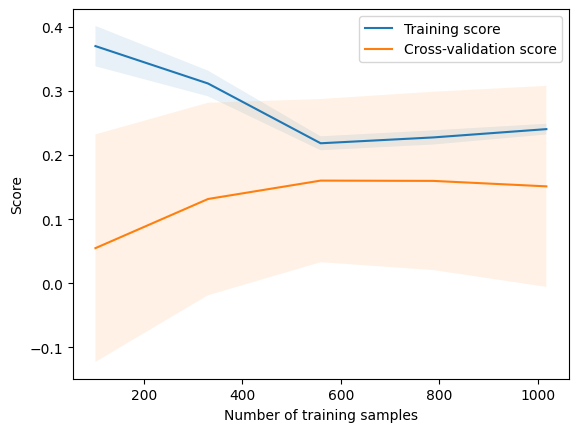

In [148]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.xlabel("Number of training samples")
plt.ylabel("Score")
plt.legend(loc="best")

plt.show()

In [141]:
train_mse = mean_squared_error(y_train, LR_model.predict(X_train))
test_mse = mean_squared_error(y_test, LR_model.predict(X_test))

train_mae = mean_absolute_error(y_train, LR_model.predict(X_train))
test_mae = mean_absolute_error(y_test, LR_model.predict(X_test))


train_mse, test_mse, train_mae, test_mae

(0.7771481949219824, 0.7491097323114911, 0.674103957134681, 0.6648333494986611)

In this case, the training set has an MSE of 0.79004075166609 and a MAE of 0.6829264539441532, while the test set has an MSE of 0.7945367924090353 and a MAE of 0.6914542142171691. These metrics suggest that the model may be slightly overfitting, as the test set performance is slightly worse than the training set performance.

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np


# Perform 5-fold cross-validation and calculate the mean R^2 score
scores = cross_val_score(LR_model, X, y, cv=5, scoring='r2')
print('Mean R^2 score:', np.mean(scores))


Mean R^2 score: 0.16494829511619416


In [143]:
#Higher Mean R2 is better... 

In [149]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

# calculate the evaluation metrics
mae = mean_absolute_error(y_test, lr_pred)
rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
r2 = r2_score(y_test, lr_pred)
mape = mean_absolute_percentage_error(y_test, lr_pred)

# print the evaluation metrics
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Mean Absolute Percentage Error:", mape)


Mean Absolute Error: 0.6692104070157234
Root Mean Squared Error: 0.8744618083419046
R-squared: 0.1724064528188537
Mean Absolute Percentage Error: 1.2886053434797513


In [151]:
print(len(y_test))
print(len(lr_pred))

269
269


In [154]:
perm = PermutationImportance(LR_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=50)

Weight,Feature
0.1260 ± 0.0657,retail_price
0.0669 ± 0.0302,product_variation_inventory
0.0635 ± 0.0257,inventory_total
0.0373 ± 0.0267,units_sold
0.0251 ± 0.0270,product_id
0.0125 ± 0.0170,countries_shipped_to
0.0109 ± 0.0138,product_variation_size_id
0.0038 ± 0.0062,merchant_title
0.0030 ± 0.0094,product_color
0.0015 ± 0.0038,origin_country


In [155]:
del df['theme']
del df['crawl_month']
del df['shipping_is_express']
del df['merchant_name']
del df['tags']
del df['shipping_option_name']
del df['merchant_info_subtitle']

#Linear regression 2

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341 entries, 0 to 1572
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title                        1341 non-null   int64  
 1   price                        1341 non-null   float64
 2   retail_price                 1341 non-null   float64
 3   units_sold                   1341 non-null   float64
 4   product_color                1341 non-null   int64  
 5   product_variation_size_id    1341 non-null   int64  
 6   product_variation_inventory  1341 non-null   float64
 7   countries_shipped_to         1341 non-null   float64
 8   inventory_total              1341 non-null   float64
 9   origin_country               1341 non-null   int64  
 10  merchant_title               1341 non-null   int64  
 11  merchant_id                  1341 non-null   int64  
 12  product_id                   1341 non-null   int64  
dtypes: float64(6), int

In [165]:
X = df.drop('price', axis=1)
y = df['price']

In [166]:
#Spliting data into Training 80%, Testing 20% 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [167]:
X_train.shape, y_train.shape , X_test.shape, y_test.shape

((1072, 12), (1072,), (269, 12), (269,))

In [169]:
LR2_model = LinearRegression()

LR2_model.fit(X_train,y_train)


print('Coefficients:', LR_model.coef_)
print('Intercept:', LR_model.intercept_)


Coefficients: [-7.65298424e-05  2.87147479e-01 -1.23904958e-01 -1.24508628e-04
 -1.00165116e-03 -2.88883037e-03  3.34329406e-02  4.53501307e-02
  1.23087439e-04 -1.56189776e-05 -1.04979669e-04  1.34567735e-04
 -3.13112231e-04 -2.08166817e-17 -4.85722573e-17  2.20534555e-01
  1.18659720e-01 -1.03217065e-01 -1.52596523e-01]
Intercept: 77.82973670062454


In [170]:
lr2_pred = LR2_model.predict(X_test)

In [171]:
train_sizes, train_scores, test_scores = learning_curve(LR2_model, X_train, y_train, cv=20)

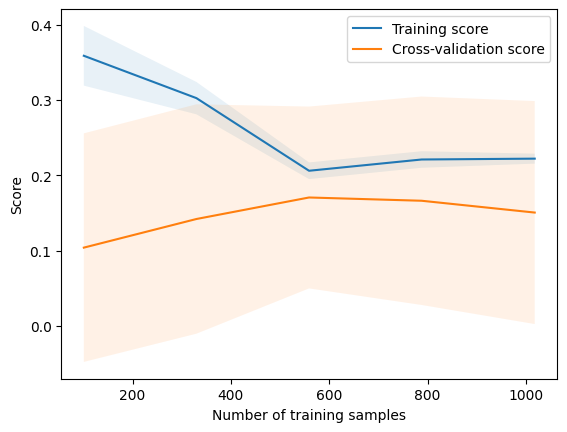

In [172]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.xlabel("Number of training samples")
plt.ylabel("Score")
plt.legend(loc="best")

plt.show()

In [173]:
train_mse = mean_squared_error(y_train, LR2_model.predict(X_train))
test_mse = mean_squared_error(y_test, LR2_model.predict(X_test))

train_mae = mean_absolute_error(y_train, LR2_model.predict(X_train))
test_mae = mean_absolute_error(y_test, LR2_model.predict(X_test))


train_mse, test_mse, train_mae, test_mae

(0.7941601819348718,
 0.7536737421631937,
 0.6762196414135444,
 0.6659730760509567)

In [175]:
# Perform 5-fold cross-validation and calculate the mean R^2 score
scores = cross_val_score(LR2_model, X, y, cv=5, scoring='r2')
print('Mean R^2 score:', np.mean(scores))

Mean R^2 score: 0.1804635472902407


In [176]:
# calculate the evaluation metrics
mae = mean_absolute_error(y_test, lr2_pred)
rmse = np.sqrt(mean_squared_error(y_test, lr2_pred))
r2 = r2_score(y_test, lr2_pred)
mape = mean_absolute_percentage_error(y_test, lr2_pred)

# print the evaluation metrics
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Mean Absolute Percentage Error:", mape)

Mean Absolute Error: 0.6659730760509567
Root Mean Squared Error: 0.8681438487734586
R-squared: 0.18432192794463986
Mean Absolute Percentage Error: 1.2907071767545495
